ML:
    1. Supervised
        a. Regression
        b. Classification
    2. Unsupervised
        a. Clustering
        b. Association
    3.Reinforced

Linear Regression

y = B0 + B1x

y - Dependent Variable
x - independent Variable 

**House Price prediction using Linear Regression and XGBoast Algorithms**

The prediction of house price depends upon factors of x such as place,sqft,how many years old, floor and many.

In [0]:
#import numpy and pandas
import pandas as pd
import numpy as np


In [0]:
#reading the dataset in csv file.
hp = pd.read_csv('hp_data.csv')

In [0]:
hp.head()

#exploratory data analysis (EDA)

,PIN,price,place,built,sqft,sale,yearsOld,floor,totalFloor,bhk
0,1341,6300000,BTM Layout,Super built-up Area,1450,Resale,5,1,4,1
1,2126,11500000,Yelahanka,Super built-up Area,2190,Resale,5,3,5,3
2,816,3800000,Whitefield,Super built-up Area,1019,Resale,1,2,5,2
3,2708,10500000,Ambalipura,Super built-up Area,1857,Resale,15,4,5,4
4,1041,11500000,Yelahanka,Super built-up Area,2190,Resale,5,3,5,3


In [0]:
#Information of the data
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 10 columns):
PIN           3500 non-null int64
price         3500 non-null int64
place         3500 non-null object
built         3500 non-null object
sqft          3500 non-null int64
sale          3500 non-null object
yearsOld      3500 non-null int64
floor         3500 non-null int64
totalFloor    3500 non-null int64
bhk           3500 non-null int64
dtypes: int64(7), object(3)
memory usage: 273.5+ KB


In [0]:
hp.shape
#shape and size of data

(3500, 10)

In [0]:
hp.size


35000

In [0]:
hp.isnull().sum()
#to find null values

PIN           0
price         0
place         0
built         0
sqft          0
sale          0
yearsOld      0
floor         0
totalFloor    0
bhk           0
dtype: int64

In [0]:
#import matplotlib and seaborn to analys using graphs
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [0]:
hp.corr()
#correlation

,PIN,price,sqft,yearsOld,floor,totalFloor,bhk
PIN,1.000000,0.030283,0.001018,-0.022503,0.005641,0.008018,0.005641
price,0.030283,1.000000,0.778364,0.215712,0.263472,0.402256,0.263472
sqft,0.001018,0.778364,1.000000,0.229461,0.356053,0.358946,0.356053
yearsOld,-0.022503,0.215712,0.229461,1.000000,-0.116427,-0.142562,-0.116427
floor,0.005641,0.263472,0.356053,-0.116427,1.000000,0.958100,1.000000
totalFloor,0.008018,0.402256,0.358946,-0.142562,0.958100,1.000000,0.958100
bhk,0.005641,0.263472,0.356053,-0.116427,1.000000,0.958100,1.000000


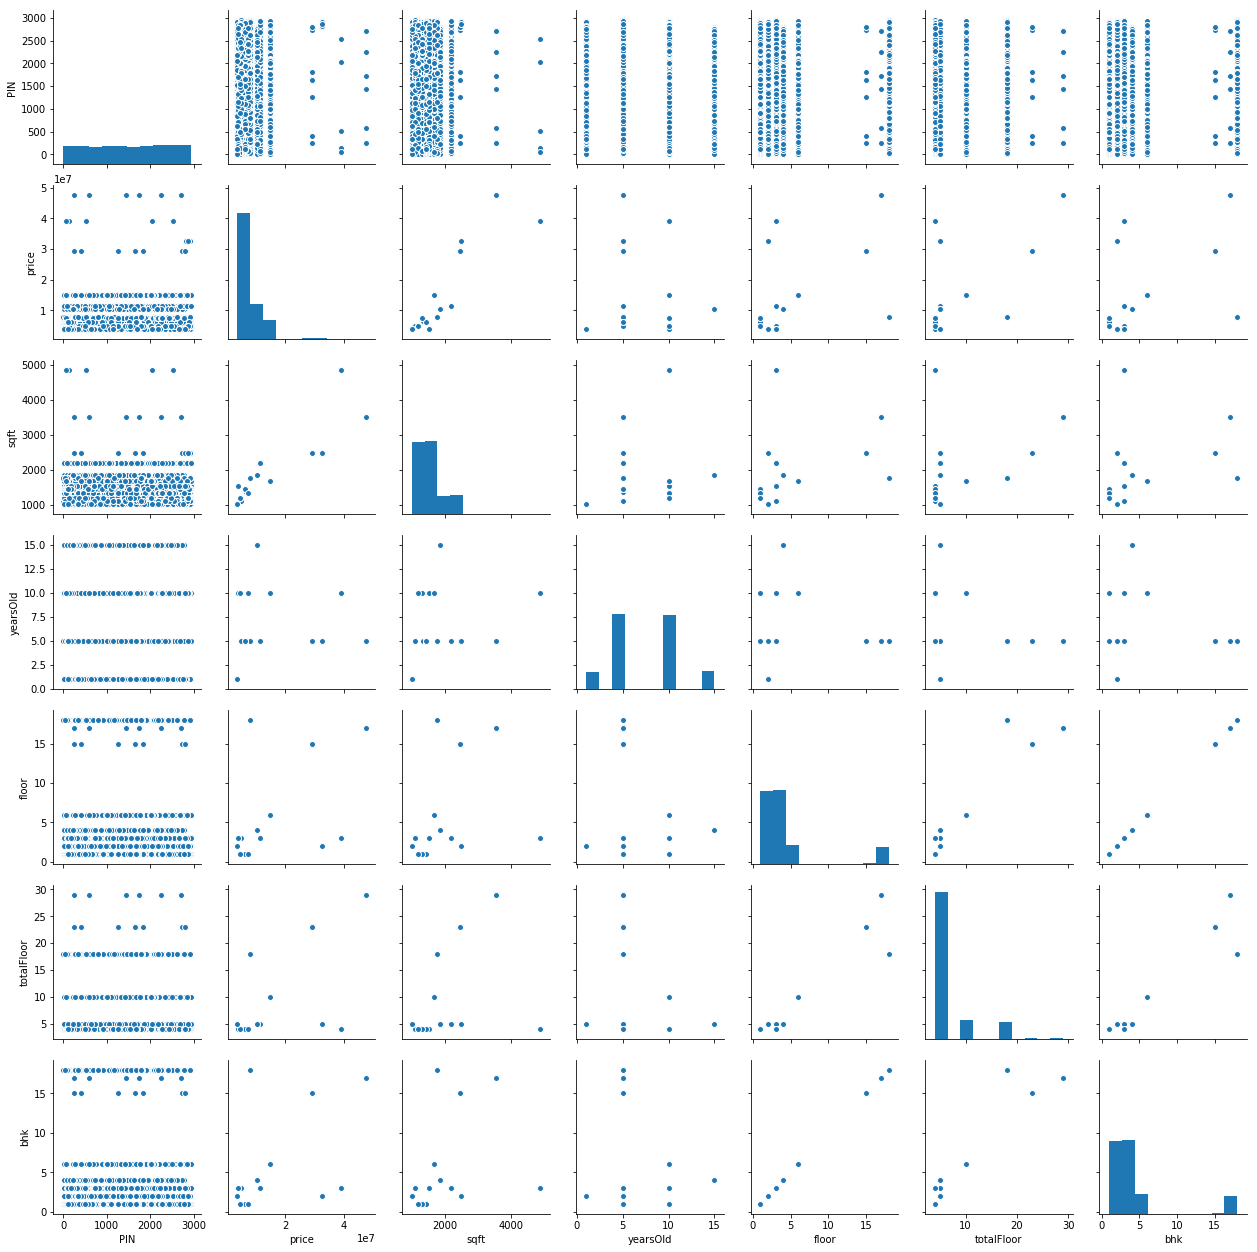

In [0]:
#using seaborn the below graphs is plot of relations between with each other
sb.pairplot(hp)

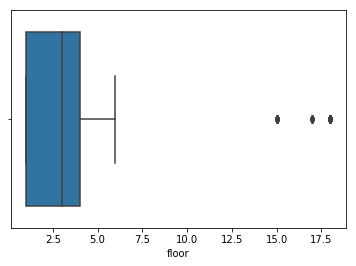

In [0]:
sb.boxplot(hp.floor)

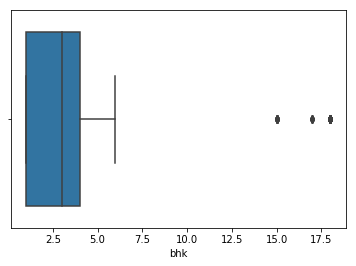

In [0]:
sb.boxplot(hp.bhk)

In [0]:
data = hp[(hp['floor']<15)]

In [0]:
x = hp.iloc[:, [2, 3, 4, 7, 8, 9]]
X = data.iloc[:, [2, 3, 4, 7, 8, 9]]
#Including only those factors with effects the y i.e.,price

In [0]:
x.head()


X.head()


,place,built,sqft,floor,totalFloor,bhk
0,2,1,1450,1,4,1
1,11,1,2190,3,5,3
2,9,1,1019,2,5,2
3,1,1,1857,4,5,4
4,11,1,2190,3,5,3


In [0]:
y = hp['price']
Y = data['price']
#hp.price

In [0]:
y.head()

0     6300000
1    11500000
2     3800000
3    10500000
4    11500000
Name: price, dtype: int64

In [0]:
#Scikit Learn
#splitting model for training and testing sets

from sklearn.model_selection import train_test_split

In [0]:
#spliting the data into 80% traning data and 20% testing data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 5)

**Applying ML Algorithm LinearRegression:**

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
model = LinearRegression()

#temporary name

In [0]:
model.fit(x_train, y_train)
#model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
predict = model.predict(x_test)
#predict1 = model.predict(X_test)

In [0]:
from sklearn.metrics import r2_score

In [0]:
#accuracy of model

r2_score(y_test, predict)


#r2_score(Y_test, predict1)

0.850820652965615

sklearn.preprocessing
converting categorical to numerical data

a. label encoder (random number)
b. one hot encoder
c. get dummies (recent - 1 line)

from sklearn.preprocessing import tab - many to use while processing data of different types

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
le = LabelEncoder()

In [0]:
hp['place'] = le.fit_transform(hp['place'])

In [0]:
hp['sale'] = le.fit_transform(hp['sale'])

In [0]:
hp['built'] = le.fit_transform(hp['built'])

hp['sale'].unique()

#as they all have the same value, price not affected

array([0], dtype=int64)